# Uygulama Notları: 9
## FİZ219 - Bilgisayar Programlama I | 23/12/2019

**Fonksiyonlar II: Eğik Atış Problemi**
* Problemin Tanımı ve Uçuş Süresinin Hesabı
    * Analitik çözüm
    * Sayısal çözüm: yarılama metodu (bisection)
    * Hazır gelen kök bulma fonksiyonu: roots()
* Konumların hesaplanması
    * Fonksiyonlaştırmak
* Bonus: Güzel grafikler, cici grafikler (Ek bilgi, ilgilenirseniz diye)
* "Meydan okumalar" (_Challenges_)
    * İleri düzey fonksiyonlaştırmak
    * Korsan gemisini vuran top

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

# Eğik Atış Problemi
## Problemin Tanımı ve Uçuş Süresinin Hesabı
$v_0$ ilk hızı ve yatayla $\theta$ açısı yapacak şekilde atılan $m$ kütleli bir cismin üzerine düşey yönde, -y yönünde $F_g=mg$ yerçekimi kuvveti etki ederken, yatay yönde etki eden herhangi bir kuvvet bulunmamaktadır. 

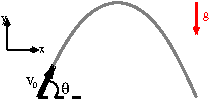

Bu durumda, $\vec{r(t)} = \vec{r_0} + \vec{v_0} t + \frac{1}{2} \vec{a} t^2$ genel hareket denklemi, _x_ ve _y_ eksenleri yönlerinde bileşenlerine ayrıldığında:
\begin{equation*}
v_{0,x} = v_0 \cos{\theta}\\
v_{0,y} = v_0 \sin{\theta}\\
x_0 = y_0 = 0\\
a_x = 0\\
a_y = -g\\
\end{equation*}


\begin{align}
x(t) &= x_0 + v_{0,x} t + {\tfrac{1}{2}} a_x t^2\\
\rightarrow x(t) &= v_{0,x} t = v_0 \cos{\theta} t
\end{align}



\begin{align}
y(t) &= y_0 + v_{0,y} t + {\tfrac{1}{2}} a_y t^2\\
\rightarrow y(t) &= v_{0,y} t + {\tfrac{1}{2}} (-g) t^2 = v_0  \sin{\theta} t -  {\tfrac{1}{2}} g t^2 
\end{align}

olarak bulunur.

Cismin toplam uçuş zamanı $t_d$, atıldıktan sonra _y_ değerinin 0 olduğu andır. Bu anı bulmak için:$$y(t_d) =  v_0  \sin{\theta} t_d -  {\tfrac{1}{2}} g t_d^2 = 0$$ denklemini çözeriz.

Problemimizde parametrelerimizi: $v_0 = 30\, \text{m/s}$, $\theta = 60^{o}$, $g = -9.81\, \text{m/s}^2$ olarak alalım.


### Analitik çözüm:
İkinci dereceden $ax^2 + b x + c = 0$ denkleminin çözümü: $$ x_{1,2} = \frac {-b \pm \sqrt{b^2 - 4 a c}}{2a} $$ şeklinde bulunur. Katsayıları elimizdeki $t_d$ için uygularsak:$$a= -  {\tfrac{1}{2}} g,\;b= v_0  \sin{\theta},\;c=0\\
t_{d_{1,2}} = \frac{-v_0  \sin{\theta} \pm \sqrt{(v_0  \sin{\theta})^2 - 4 (-  {\tfrac{1}{2}} g) (0)}}{2 (-  {\tfrac{1}{2}} g)} = \frac{-v_0 \sin{\theta} \pm v_0 \sin{\theta} }{-g}={0, \frac{2 v_0 \sin{\theta}}{g}}$$

İlk kök ($t_d = 0$) zaten atış anına geldiğinden bariz; bizi ilgilendiren ikinci, $t_d = \frac{2 v_0 \sin{\theta}}{g}$ kökü. $(x,y)$'nin zamana göre değerlerini hesaplarken aralığımızı sıfırdan bu ana kadar alacağız.

Problemimize özel değerleri yerine koyduğumuzda: $$t_d = \frac{2 v_0 \sin{\theta}}{g} = \frac{2\cdot 30 \sin{(60)}}{9.81}\,\text{s}$$

In [1]:
v0 = 30;
theta = 60;
g = 9.81;
t_d = 2*v0*sind(theta)/g

t_d =  5.2968


saniye olarak bulunur. Hatta daha da hassas yazdıralım:

In [2]:
printf("Toplam ucus zamani: %9.6f s\n",t_d)

Toplam ucus zamani:  5.296791 s


### Sayısal çözüm: yarılama metodu (_bisection_)
Sürekli bir f(x) fonksiyonun verilen belirli bir [a,b] aralığında işaret değiştirdiğini biliyorsak, o halde fonksiyonun o aralıkta en az bir kere yatay ekseni kestiğinin, yani y'nin en az bir kere sıfır değerini aldığının, _yani_ en az bir tane kökü olduğunun **garantisi vardır**. O halde yapabileceğimiz bir şey, a ile b'nin tam ortasındaki c değerinde fonksiyonun işaretine bakmak, eğer f(a) ile f(c) aynı işaretse bu sefer kökü aramamıza c ile b arasında devam etmek (bu sefer c'ye a deyip, b'yi aynı tutup, yeni c'yi bu yeni a (_eski c_) ile b'nin orta noktası almak); f(a) ile f(c) zıt işaretliyse, arayışımızı a ile c arasına odaklamak suretiyle gerçek köke istediğimiz hassasiyette yaklaşabiliriz.

Önce, y yönündeki hareket denklemini fonksiyon olarak tanımlayalım:

In [3]:
function f=atis_y(v0,theta,t,g=9.81)
f = v0*sind(theta)*t - 0.5*g*t^2;
endfunction

v0 = 30;
theta = 60;

% atıldıktan az sonraki (t=0.01s) yüksekliğe bakalım:
a = 0.01;
printf("atildiktan %6.3f saniye sonraki yukseklik: %10.5f m.\n",a,atis_y(v0,theta,a))

% bir de 10 saniye sonraki yüksekliğe bakalım:
b = 10;
printf("atildiktan %6.3f saniye sonraki yukseklik: %10.5f m.\n",b,atis_y(v0,theta,b))

atildiktan  0.010 saniye sonraki yukseklik:    0.25932 m.
atildiktan 10.000 saniye sonraki yukseklik: -230.69238 m.


Görüldüğü üzere, 10 saniye sonra yükseklik -230.7 olarak verildiğinden, 0 ile 10. saniyeler arasında bir yerde cismimiz yatay eksenden geçmiş. Peki ama nerede? 

In [4]:
% 0.01. ile  10 saniyenin tam ortasındaki anda ne yükseklikte idi?
c = (a + b) / 2;
printf("atildiktan %6.3f saniye sonraki yukseklik: %10.5f m.\n",c,atis_y(v0,theta,c))

atildiktan  5.005 saniye sonraki yukseklik:    7.16334 m.


Atıldıktan 5.005 saniye sonra yüksekliği pozitif; demek ki cisim hala yer seviyesinin üzerindeymiş. Bu durumda "yere çarpış", 5.005 ile 10. saniye arasında bir anda yer alıyor. Bu durumda biraz önce a=0.01s, b=10s için yaptığımız hesabı şimdi a=5.005s ile b=10s için yapacağız.. Bunu sistematiğe bağlarsak:

In [1]:
clear;

function f=atis_y(v0,theta,t,g=9.81)
f = v0*sind(theta)*t - 0.5*g*t^2;
endfunction

v0 = 30;
theta = 60;

istenilen_hassasiyet = 0.00001;

a = 0.01;
f_a = atis_y(v0,theta,a);

b = 10;
f_b = atis_y(v0,theta,b);

adim = 1;
while(abs(a-b)>istenilen_hassasiyet)
    % arama araliginin boyu |a-b|, istenilen hassasiyetten
    % buyuk oldugu surece, yarilamaya devam ediyoruz
    c = (a+b)/2;
    f_c = atis_y(v0,theta,c);
    printf("%2d: %9.6f  %10.5f | %9.6f  %10.5f | %9.6f  %10.5f\n",adim,a,f_a,c,f_c,b,f_b);
    if(sign(f_c) == sign(f_a))
        % c ile a'nın yükseklikleri aynı işaretli, o zaman 
        % arada kök olmasının garantisi yok, arayışa c ile b 
        % arasında devam edelim
        a = c;
        f_a = f_c;
    else
        % c ile b'nin yükseklikleri aynı işaretli, o zaman 
        % arada kök olmasının garantisi yok, arayışa a ile c 
        % arasında devam edelim
        b = c;
        f_b = f_c;
    endif
    adim = adim + 1;
endwhile

 1:  0.010000     0.25932 |  5.005000     7.16334 | 10.000000  -230.69238
 2:  5.005000     7.16334 |  7.502500   -81.16955 | 10.000000  -230.69238
 3:  5.005000     7.16334 |  6.253750   -29.35436 |  7.502500   -81.16955
 4:  5.005000     7.16334 |  5.629375    -9.18332 |  6.253750   -29.35436
 5:  5.005000     7.16334 |  5.317187    -0.53195 |  5.629375    -9.18332
 6:  5.005000     7.16334 |  5.161094     3.43521 |  5.317187    -0.53195
 7:  5.161094     3.43521 |  5.239141     1.48151 |  5.317187    -0.53195
 8:  5.239141     1.48151 |  5.278164     0.48225 |  5.317187    -0.53195
 9:  5.278164     0.48225 |  5.297676    -0.02298 |  5.317187    -0.53195
10:  5.278164     0.48225 |  5.287920     0.23010 |  5.297676    -0.02298
11:  5.287920     0.23010 |  5.292798     0.10368 |  5.297676    -0.02298
12:  5.292798     0.10368 |  5.295237     0.04038 |  5.297676    -0.02298
13:  5.295237     0.04038 |  5.296456     0.00871 |  5.297676    -0.02298
14:  5.296456     0.00871 |  5.297066 

Görüldüğü üzere, bu şekilde, gerçek (analitik) değere verilen hassasiyet mertebesinde yaklaşmış olduk.

### Hazır gelen kök bulma fonksiyonu: roots()
Bir polinom denkleminin köklerini `roots()` komutu ile hesaplayabiliriz. Fonksiyonun parametreleri en yüksek dereceli terimin katsayısından başlayarak, sabit katsayıya kadar yazılmış katsayılar vektörüdür. Örneğin: $3x^3 -4x +7 = 0$ denkleminin kökünü bulmak için:

In [6]:
roots([3 0 -4 1])

ans =

  -1.26376
   1.00000
   0.26376



yazarız (burada $x^2$ olmadığı için, onun katsayısını 0 aldığımıza dikkat edin). 

Problemimizdeki ikinci dereceden parabol denklemimiz: $$y(t_d) =  v_0  \sin{\theta} t_d -  {\tfrac{1}{2}} g t_d^2 = 0$$ idi. Katsayıları roots() fonksiyonunda yerine koyacak olursak:

In [7]:
v0 = 30;
theta = 60;
g = 9.81;
roots([-0.5*g v0*sind(theta) 0])


ans =

   5.29679
   0.00000



şeklinde doğrudan kökü bulmuş oluruz. (Bir de, polinom olsun olmasın, en uygun metotla kök bulan `fzero()` fonksiyonu var ama şimdilik onu bir kenarda bırakıyoruz)

## Konumların hesaplanması
Artık uçuş süresini bildiğimize göre, bu uçuş süresi boyunca cismimizin koordinatlarını hareket denklemlerinden hesaplayabilir, ardından grafiğini de çizdirebiliriz.

Zaman aralığını $[0,t_d]$ arasında, başlangıç için 5 nokta alıp inceleyelim, bunları yaparken, sıfırdan başlayıp, toparlayalım:

t_d =  5.2968
t_ler =

   0.00000   1.32420   2.64840   3.97259   5.29679

y_konumlari =

    0.00000   25.80275   34.40367   25.80275    0.00000



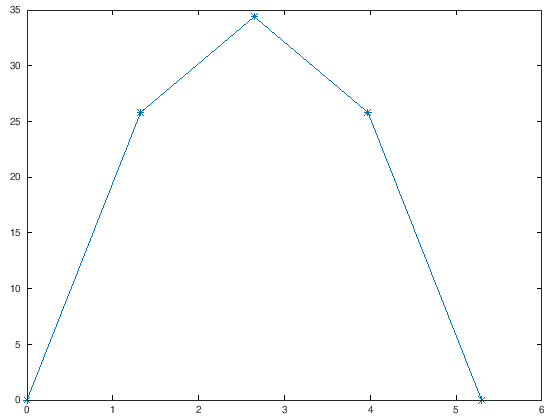

In [8]:
clear;

function f=atis_y(v0,theta,t,g=9.81)
f = v0*sind(theta)*t - 0.5*g*t^2;
endfunction

v0 = 30;
theta = 60;
g = 9.81;

t_d = 2*v0*sind(theta)/g

N = 5;

t_ler = linspace(0,t_d,N)

y_konumlari = [];

for t = t_ler
    y_konumlari = [y_konumlari, atis_y(v0,theta,t)];
endfor

y_konumlari

plot(t_ler,y_konumlari,"-*")

Pek fena görünmüyor, fakat iki şeyi fark ettiyseniz ne mutlu size: programı yazarken bir önceki uygulama notlarında fonksiyonları yazarken yapmamanızı tavsiye ettiğim iki şeyi bizzat ben yapmış durumdayım. Nedir o iki şey?..

1. Fonksiyonu ayrı, kendi dosyasında değil, doğrudan programın içinde tanımladım:  
Bunu yapmak biraz mecburiyetten çünkü içeriğini görün istedim.
2. Oradaki _for..._ döngüsü:  
Elimde linspace ile çıkardığım t değerlerini içeren diziyi/listeyi/vektörü doğrudan fonksiyona beslemek varken, gayet masraflı bir şekilde for döngüsüyle tek tek fonksiyona besledim -- bu affedilecek bir şey değil. Ama fonksiyona bakacak olursanız bu haliyle  çalışamaz (nedenini görebildiniz mi?.. oradaki t^2 işlemi eleman bazlı çalışmalı, bu yüzden t.^2 olarak yazılmalıydı).

Haydi kodu bir daha, bu sefer daha verimli yazalım, hazır yazarken hesaplanan nokta sayısını da 100 yapalım (hatta oldu olacak, x'in konumlarını da hesaplayalım):

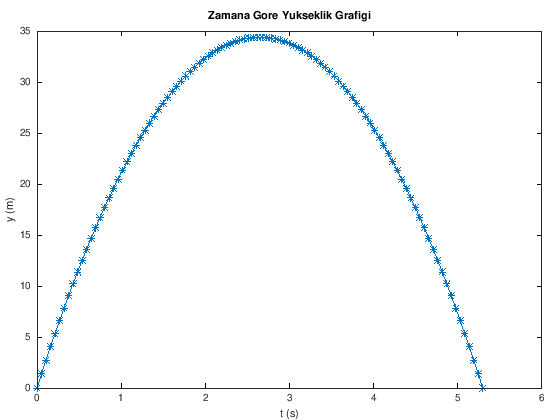

In [9]:
clear;

function f=atis_y(v0,theta,t,g=9.81)
f = v0*sind(theta)*t - 0.5*g*t.^2;
endfunction

function f=atis_x(v0,theta,t,g=9.81)
f = v0*cosd(theta)*t;
endfunction

v0 = 30;
theta = 60;
g = 9.81;

t_d = 2*v0*sind(theta)/g;

N = 100;

t_ler = linspace(0,t_d,N);

y_konumlari = atis_y(v0,theta,t_ler);
x_konumlari = atis_x(v0,theta,t_ler);

plot(t_ler,y_konumlari,"-*")
xlabel("t (s)")
ylabel("y (m)")
title("Zamana Gore Yukseklik Grafigi")


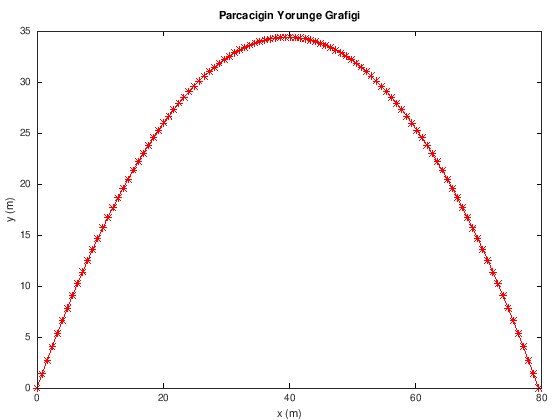

In [10]:
plot(x_konumlari,y_konumlari,"r-*")
xlabel("x (m)")
ylabel("y (m)")
title("Parcacigin Yorunge Grafigi")

## Fonksiyonlaştırmak
Şimdi öyle bir fonksiyon yazalım ki, ona ilk hızımızı ve atış açımızı (opsiyonel olarak da yerçekimsel ivmeyi) verdiğimizde, bize cismimizin toplamda kaç saniye uçtuğunu, ulaştığı maksimum yüksekliği ve yatay yönde kat ettiği menzili söylesin.

In [11]:
clear;

function [t_d,h_max,R] = ucus_analiz(v0,theta,g=9.81)
v0_y = v0*sind(theta);
t_d = 2*v0_y/g;
t_d_bolu_2 = t_d /2;
h_max = v0_y*t_d_bolu_2 - 0.5*g*t_d_bolu_2^2;
R = v0*cosd(theta) * t_d;
endfunction

ilk_hiz = 30;
aci = 60;
[ucus_zamani,max_yukseklik,menzil] = ucus_analiz(ilk_hiz,aci);
printf("Ucus zamani: %7.4fs | Maksimum Yukseklik: %6.3fm | Menzil: %6.3fm\n",ucus_zamani,max_yukseklik,menzil)

Ucus zamani:  5.2968s | Maksimum Yukseklik: 34.404m | Menzil: 79.452m


ara vermeden, aynı ilk hız için hangi açıda en uzun menzile ulaşacak bulalım:

In [12]:
ucus_zamanlari = [];
max_yukseklikler = [];
menziller = [];

acilar = 1:90;
for aci = acilar
    [ucus_zamani,max_yukseklik,menzil] = ucus_analiz(ilk_hiz,aci);
    ucus_zamanlari = [ucus_zamanlari, ucus_zamani];
    max_yukseklikler = [max_yukseklikler, max_yukseklik];
    menziller = [menziller, menzil];
endfor

sonuclar = [acilar' ucus_zamanlari' max_yukseklikler' menziller']

sonuclar =

    1.00000    0.10674    0.01397    3.20179
    2.00000    0.21345    0.05587    6.39968
    3.00000    0.32010    0.12564    9.58977
    4.00000    0.42665    0.22321   12.76817
    5.00000    0.53306    0.34845   15.93103
    6.00000    0.63932    0.50120   19.07447
    7.00000    0.74538    0.68129   22.19467
    8.00000    0.85121    0.88849   25.28783
    9.00000    0.95679    1.12256   28.35018
   10.00000    1.06207    1.38320   31.37799
   11.00000    1.16703    1.67010   34.36758
   12.00000    1.27163    1.98290   37.31529
   13.00000    1.37585    2.32124   40.21754
   14.00000    1.47964    2.68469   43.07079
   15.00000    1.58299    3.07281   45.87156
   16.00000    1.68586    3.48514   48.61645
   17.00000    1.78821    3.92116   51.30210
   18.00000    1.89001    4.38034   53.92525
   19.00000    1.99124    4.86214   56.48270
   20.00000    2.09187    5.36595   58.97134
   21.00000    2.19185    5.89117   61.38813
   22.00000    2.29117    6.43716   63.7301

Görüldüğü üzere, en uzun uçuş süresine ve en yükseğe tam tepeye atıldığında, $\theta=90^{o}$ olduğunda ulaşıyor ($t_d = 6.11621\text{s}$ ve $h_{max} = 45.87156\text{m}$ ile) ama en uzağa 91.74312m ile $\theta=45^{o}$ ile atıldığında ulaşıyor ki, Fizik I dersini düşündüğümüzde bu bir sürpriz olmamalı! ;)

Bir de açılara bağlı olarak grafiklerini çizdirip, tamamlayalım:

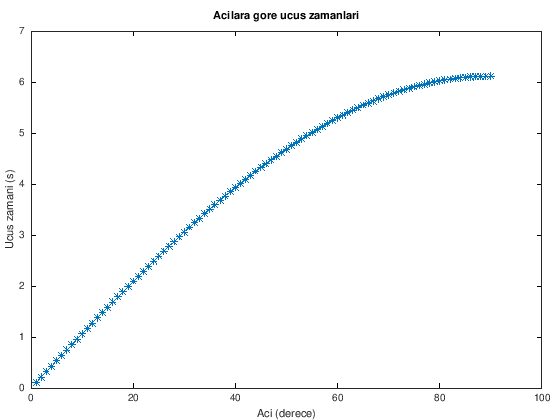

In [13]:
plot(acilar,ucus_zamanlari,"-*");
xlabel("Aci (derece)");
ylabel("Ucus zamani (s)");
title("Acilara gore ucus zamanlari");

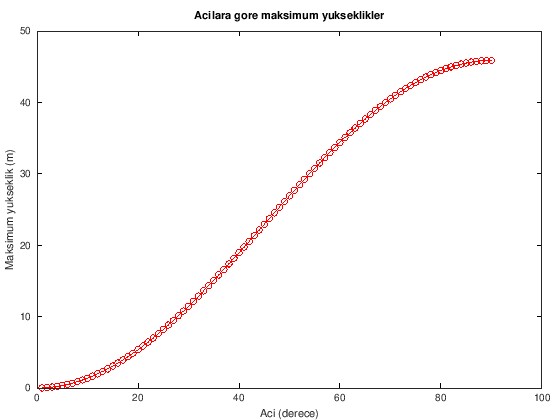

In [14]:
plot(acilar,max_yukseklikler,"r-o");
xlabel("Aci (derece)");
ylabel("Maksimum yukseklik (m)");
title("Acilara gore maksimum yukseklikler");

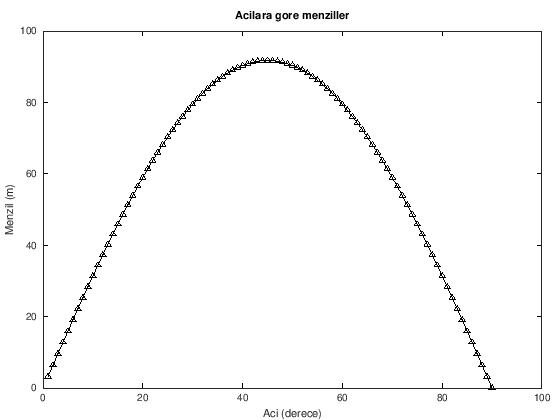

In [15]:
plot(acilar,menziller,"k-^");
xlabel("Aci (derece)");
ylabel("Menzil (m)");
title("Acilara gore menziller");

# Bonus: Güzel grafikler, cici grafikler (Ek bilgi, ilgilenirseniz diye)
Şimdiye kadar grafiklerimizi hep bir grafik bir panelin içinde ya da iki veya daha fazla grafiği üst üste bindirip, yine tek bir panel içinde olacak şekilde çizegeldik.

Fakat, elimizde birden fazla grafik olduğunda bunları derli toplu yerleştirmek için `subplot()` komutunu kullanıyoruz. Bu komut, panelimizi belirttiğimiz satır ve sütuna bölüyor, sonra soldan sağa, yukarıdan aşağıya giderek bunları numaralandırıyor. Örneğin, subplot(2,3,5) ile kast ettiğimiz panelimizin 2 satır, 3 sütuna bölünüp, alttaki satırın orta sütununu aktif hale getirip, bir sonraki plot() komutumuzun sonucunun oraya çizdirilmesi. 5.'nin orası olduğunu nasıl hesapladım? En üst, en soldakine 1 deyip, soldan sağa, yukarıdan aşağı ilerleyip numaralandırarak:

<pre>+-----+-----+-----+
|  1  |  2  |  3  |
+-----+-----+-----+
|  4  |  5  |  6  |
+-----+-----+-----+</pre>

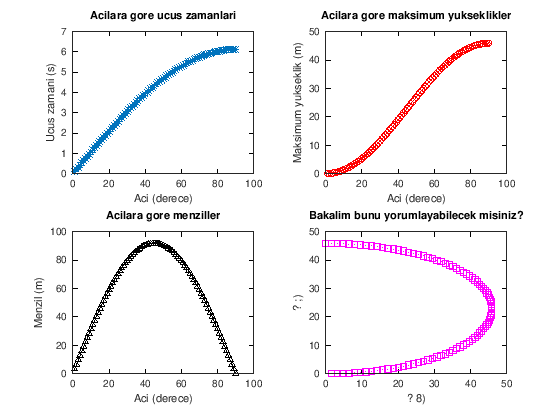

In [16]:
subplot(2,2,1);
plot(acilar,ucus_zamanlari,"-*");
xlabel("Aci (derece)");
ylabel("Ucus zamani (s)");
title("Acilara gore ucus zamanlari");

subplot(2,2,2);
plot(acilar,max_yukseklikler,"r-o");
xlabel("Aci (derece)");
ylabel("Maksimum yukseklik (m)");
title("Acilara gore maksimum yukseklikler");

subplot(2,2,3);
plot(acilar,menziller,"k-^");
xlabel("Aci (derece)");
ylabel("Menzil (m)");
title("Acilara gore menziller");

subplot(2,2,4);
plot(menziller/2,max_yukseklikler,"ms");
xlabel("? 8)");
ylabel("? ;)");
title("Bakalim bunu yorumlayabilecek misiniz?");

# Meydan okumalar (_Challenges_)
Kendini zorlamak isteyenlere iki tane meydan okuma. Ödev değildir, kesinlikle sınavınızdan önce ilgilenmenizi tavsiye etmiyorum, örneğin finallerden sonraki ara tatilde canınız sıkılırsa aklınızda olsun. Çözebilirseniz bana e-posta ile gönderebilirsiniz ama ancak bu dönemin notlarını verdikten sonra (ve o zamandan sonra da hatırlatırsanız!) incelerim. (Özetle demek istediğim, ilginizi çekerse yapmaya çalışın fakat yapın ya da yapmayın, ders notunuza doğrudan bir katkısı olmayacak, o nedenle eğer ilk iki denemenizde olmuyorsa, finallerin sonrasına bırakmanızı tavsiye ederim -- her hâlükârda notlar teslim edilene kadar kontrol etmeyeceğim 8)

## İleri düzey fonksiyonlaştırmak
Yukarıda, "Fonksiyonlaştırmak" başlıklı kısımda, cismi en uzağa taşıyacak açıyı bulmaya çalışırken, açılar üzerinden _for..._ döngüsü ile ilerledik. Halbuki bize yakışan:

`[ucus_zamanlari,max_yukseklikler,menziller] = ucus_analiz(ilk_hiz,acilar);`

şeklinde, çat! diye, tek bir çağırışta, hiçbir _for..._ döngüsü kullanmadan sonuca ulaşabilmek olmalıydı. Fonksiyonu bu şekilde (ve tabii ki fonksiyonun içinde de _for..._ kullanmadan yazabilir misiniz?
## Korsan gemisini vuran top
Halliday & Resnick'in "Fiziğin Temelleri" kitabında değişik bir örnek vardır: Sahildeki bir top $v_0 = 82\text{m/s}$ ilk hızla gülle atabiliyor. $R=560\text{m}$ ötedeki bir korsan gemisini vurması için gerekli açıyı sorar. Soru çok ilginç değil ama çözümü sonucunda bir değil, iki doğru açı çıkar.

Bu açıları, analitik yoldan değil de, nümerik yoldan tespit edip, iki atışın yörüngesini (yani x-y grafiklerini) aynı grafik üzerinde çizdirebilir misiniz?